# Wielowarstwowa sieć neuronowa

(*Multilayer perceptron*, *feedforward neural network*)



**Uwaga:** "Input layer" pomimo tego, że ma w nazwie słowo "warstwa", to tak naprawdę to nie jest żadna warstwa sieci... To są po prostu dane wejściowe... Niestety przyjęło się literaturze nazywanie tego w ten sposób, co jest mylące :(


Sieci uczy sie metodą spadku gradientu (pewnymi wariantami tej metody). Uczenie wykorzystuje algorytm **propagacji wstecznej** (https://en.wikipedia.org/wiki/Backpropagation).

<br>

<br>

<br>

**Uwaga!** Sieci neuronowe absolutnie zawsze wymagają zestandaryzowanych danych! Niezależnie od tego czy wykorzystujemy regularyzację czy nie i niezależnie od typu sieci!

<br>

<br>

### Fakt matematyczny: jednowarstwową siecią możemy otrzymać dowolny kształt. 

Co z tego wynika? To, że (teoretycznie) zawsze wystarczy sieć jednowarstwowa (odpowiednio duża). W praktyce rzeczywiście z reguły wystarcza jedna warstwa, ale mimo wszystko zawsze warto sprawdzić czy 2 (lub 3) nie zadziałają przypadkiem lepiej. Przy czym jeżeli dla dwóch wartsw jest gorzej, to nie ma sensu sprawdzać dla większej ilości.

In [44]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Zad
* Wczytaj zbiór danych
* Podziel dane na train test
* Wykonaj uczenie modeli (dobierz najlepsze parametry)
    * LogisticRegression
    * LinearSVC
    * SVC
    * KNeighborsClassifier
    * DecisionTreeClassifier
    * RandomForestClassifier
    * BaggingClassifier
    * ExtraTreesClassifier
    * AdaBoostClassifier
    * GradientBoostingClassifier
    * VotingClassifier
    * xgboost.XGBClassifier
* Porównaj wyniki na zbiorze uczącym    

In [45]:
dataset = np.loadtxt('data/diabetes.csv', delimiter=",",skiprows=1)

X = dataset[:,0:8]
Y = dataset[:,8]

print(X.shape)
print(np.mean(Y))

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5)

(768, 8)
0.3489583333333333


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

{'classifier__C': 0.1, 'preprocessing': StandardScaler()}

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.linear_model import ElasticNet

In [48]:
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_2.fit(X_train, y_train)
grid_2.best_params_

c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.598e+01, tolerance: 9.133e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.890e+01, tolerance: 9.498e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

{'elasticnet__alpha': 1, 'polynomialfeatures__degree': 2}

In [13]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
accuracy_score(log_reg.predict(X_train),y_train)

c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.77431906614786

C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\3950051964.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(X_train2,y_train.astype(np.int),svc)


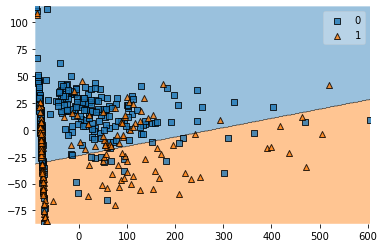

C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\3950051964.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(X_train2,y_train.astype(np.int),svc)


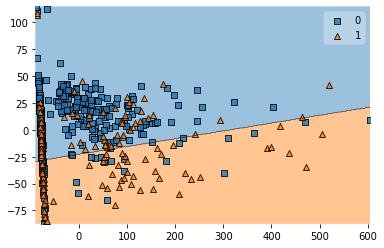

C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\3950051964.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(X_train2,y_train.astype(np.int),svc)


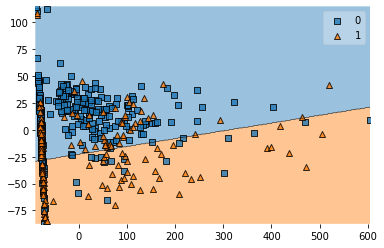

C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\3950051964.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(X_train2,y_train.astype(np.int),svc)


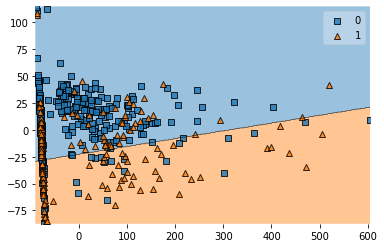

C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\3950051964.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(X_train2,y_train.astype(np.int),svc)


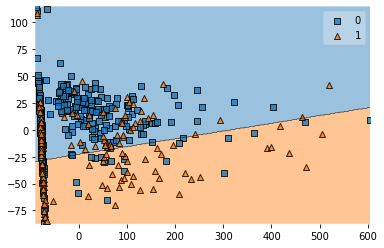

In [59]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
c_vals = [0.0001, 0.001, 0.01, 0.1, 1]

for current_c in c_vals:
    svc = SVC(kernel="linear", C=current_c)
    grid_3 = svc.fit(X_train2, y_train)
    plot_decision_regions(X_train2,y_train.astype(np.int),svc)
    plt.show()

C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\3799157525.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(X_train2, y_train.astype(np.int), tree_clf2)


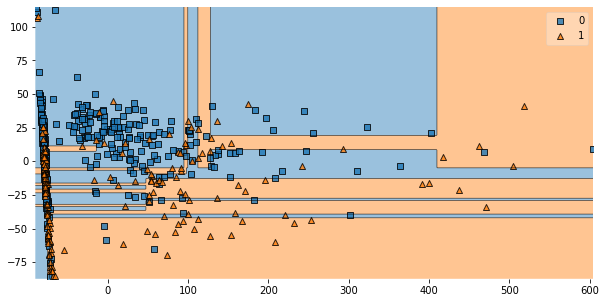

[Text(0.5261075949367089, 0.9736842105263158, 'X[1] <= -4.975\ngini = 0.45\nsamples = 514\nvalue = [338, 176]'),
 Text(0.2555379746835443, 0.9210526315789473, 'X[1] <= -36.607\ngini = 0.473\nsamples = 195\nvalue = [75, 120]'),
 Text(0.10126582278481013, 0.868421052631579, 'X[0] <= -75.256\ngini = 0.32\nsamples = 70\nvalue = [14, 56]'),
 Text(0.08860759493670886, 0.8157894736842105, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.11392405063291139, 0.8157894736842105, 'X[1] <= -57.692\ngini = 0.285\nsamples = 64\nvalue = [11, 53]'),
 Text(0.06329113924050633, 0.7631578947368421, 'X[1] <= -65.381\ngini = 0.384\nsamples = 27\nvalue = [7, 20]'),
 Text(0.0379746835443038, 0.7105263157894737, 'X[0] <= -70.756\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.02531645569620253, 0.6578947368421053, 'X[0] <= -71.907\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.012658227848101266, 0.6052631578947368, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.0379746835443038, 0.605

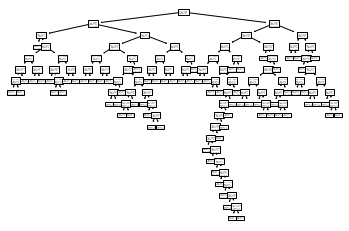

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
grid_4 = tree_clf2.fit(X_train2, y_train)

plt.figure(figsize=(10, 5))
plot_decision_regions(X_train2, y_train.astype(np.int), tree_clf2)
plt.show()

from sklearn import tree
tree.plot_tree(tree_clf2)

C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\630246837.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(X2[0:514], y_train.astype(np.int), ada_clf)


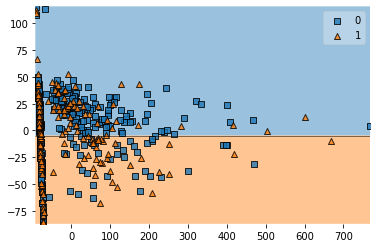

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
X2 = pca.fit_transform(X)
X_train2 = X_train2[0:514]
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=1, learning_rate=0.5, 
    algorithm="SAMME.R", random_state=42)
grid_5 = ada_clf.fit(X_train2, y_train)
plot_decision_regions(X2[0:514], y_train.astype(np.int), ada_clf)
plt.show()

C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\1376662797.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(X_test2, y_test.astype(np.int), clf1)


<AxesSubplot:>

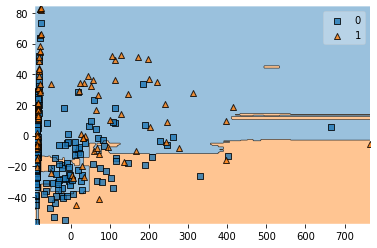

In [52]:
from sklearn.ensemble import RandomForestClassifier
from  mlxtend.plotting  import plot_decision_regions
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf1 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
grid_6 = clf1.fit(X_train2, y_train)
X_test2 = pca.fit_transform(X_test)
plot_decision_regions(X_test2, y_test.astype(np.int), clf1)



C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\2312897081.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  grid_7 = ada_clf.fit(X_train2, y_train.astype(np.int))
C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\2312897081.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, che

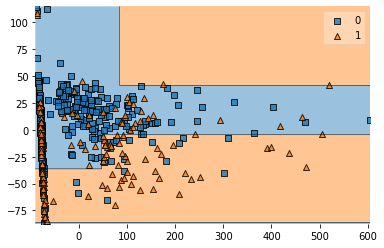

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

ada_clf = GradientBoostingClassifier(n_estimators=1, learning_rate=0.5, random_state=42)
grid_7 = ada_clf.fit(X_train2, y_train.astype(np.int))
plot_decision_regions(X_train2, y_train.astype(np.int), ada_clf)
plt.show()

In [61]:
from sklearn import  metrics


models = []
models.append(('SVM linear', grid_1.best_estimator_))
#models.append(('elasticNet', grid_2.best_estimator_))
# models.append(('SVC linear', grid_3.best_estimator_))
# models.append(('Decisiontree', grid_4.best_estimator_))
# models.append(('AdaBoostClassifier', grid_5.best_estimator_))
# models.append(('RandomForestClassifier', grid_6.best_estimator_))
# models.append(('GradientBoostingClassifier', grid_7.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))            
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))        
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

SVM linear
precision_score: 0.7341772151898734
recall_score: 0.6304347826086957
f1_score: 0.6783625730994152
accuracy_score: 0.7834645669291339
roc_auc_score: 0.829777241009125


In [62]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM linear'])#,'SVM rbf','LR','KNN', 'DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','ExtraTreesClassifier', 'AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','XGBClassifier r', 'voting'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,SVM linear,0.734177,0.630435,0.678363,0.783465,0.829777


# MLPClassifier

Dodajmy model sieci neuronowej

In [63]:
from sklearn.neural_network import MLPClassifier

In [64]:
model = MLPClassifier((20,10))
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
predictions = y_pred.round()

accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", metrics.roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 67.32% AUC:  0.7312130971551261


c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Zad
Wykonaj Walidację krzyżową

In [65]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__hidden_layer_sizes': [(20,10)],
            'classifier__learning_rate_init': [0.001],#, 0.01, 0.1],
            'classifier__max_iter': [100],
            'classifier__batch_size': [8, 16,32],
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Paweł\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

{'classifier__batch_size': 16,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.001,
 'classifier__max_iter': 100,
 'preprocessing': StandardScaler()}

In [20]:
metrics.accuracy_score(y_test, grid_2.best_estimator_.predict(X_test))

0.7716535433070866

In [ ]:
from sklearn import  metrics


models = []
models.append(('SVM linear', grid_1.best_estimator_))
models.append(('SVM rbf', grid_2.best_estimator_))
models.append(('LR', grid_3.best_estimator_))
models.append(('KNN', grid_4.best_estimator_))
models.append(('DecisionTreeClassifier', grid_5.best_estimator_))
models.append(('BaggingClassifier', grid_6.best_estimator_))
models.append(('RandomForestClassifier', grid_7.best_estimator_))
models.append(('ExtraTreesClassifier', grid_8.best_estimator_))
models.append(('AdaBoostClassifier', grid_9.best_estimator_))
models.append(('GradientBoostingClassifier', grid_10.best_estimator_))
models.append(('XGBClassifier', grid_11.best_estimator_))
models.append(('XGBClassifier r2', grid_12.best_estimator_))
models.append(('voting_clf', voting_clf))
models.append(('MLP', grid_14.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))            
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))        
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

In [8]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM linear','SVM rbf','LR','KNN', 'DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','ExtraTreesClassifier', 'AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','XGBClassifier r', 'voting', 'MLP'])
df

# Wczytaj dane treningowe i testowe

In [66]:
# Wczytaj dane treningowe i testowe

import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()



dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# print(X_train.shape)
# X_test.shape

C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\2503454130.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
C:\Users\Paweł\AppData\Local\Temp\ipykernel_12992\2503454130.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


In [67]:
print(X_train.shape)
print(X_test.shape)

(30162, 41)
(15060, 41)


# Zad
Porównaj wyniki sieci na:
* oryginalnych danych 
* na wystandaryzowanych

In [68]:
model = MLPClassifier((20,10))
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
predictions = y_pred.round()

accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", metrics.roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 83.11% AUC:  0.8886079415683288


In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

model = MLPClassifier((20,10))
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
predictions = y_pred.round()

accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", metrics.roc_auc_score(y_score=y_pred,y_true=y_test))

(30162, 41)
Accuracy: 84.66% AUC:  0.9007294085458699
